In [27]:
%matplotlib inline

from __future__ import print_function, division
import numpy as np
import sys, os
from astropy.table import Table
import fitsio
import matplotlib.pyplot as plt

In [61]:
cat = Table.read('/Users/roz18/Downloads/mosdef_zcat.final.fits')
# cat = Table.read('/Users/roz18/Downloads/mosdef_zcat.16aug2016.fits')

In [64]:
print(len(cat))
mask = cat['TARGET']==1
cat = cat[mask]
print(len(cat))
mask = (cat['Z_MOSFIRE']>0)
cat = cat[mask]
print(len(cat))
mask = cat['Z_MOSFIRE_ZQUAL']==7
cat = cat[mask]
print(len(cat))

1114
1114
1114
1114


In [63]:
cat.write('/Users/roz18/Downloads/mosdef_zcat.final.reduced.fits')

In [46]:
cat

FIELD,ID_V2,ID_V4,RA,DEC,Z_MOSFIRE,Z_MOSFIRE_ZQUAL,MASKNAME,TARGET
str7,int32,int32,float64,float64,float32,int32,str8,int32
AEGIS,12870,36257,214.71847534,52.79872513,2.130651,7,ae2_03,1
AEGIS,12528,34966,214.73649597,52.80632401,1.4176809,7,ae2_03,1
AEGIS,12046,33808,214.7375946,52.80190277,2.2253952,7,ae2_03,1
AEGIS,11578,32354,214.74291992,52.79995728,2.132772,7,ae2_03,1
AEGIS,11299,31044,214.75021362,52.80117035,2.2945035,7,ae2_03,1
AEGIS,10503,28799,214.75624084,52.79592896,2.2140515,7,ae2_03,1
AEGIS,10002,27274,214.79962158,52.82111359,1.6133572,7,ae2_03,1
AEGIS,9501,26028,214.80477905,52.8199501,2.158312,7,ae2_03,1
AEGIS,7761,21675,214.78811646,52.79070282,2.4631245,7,ae2_03,1


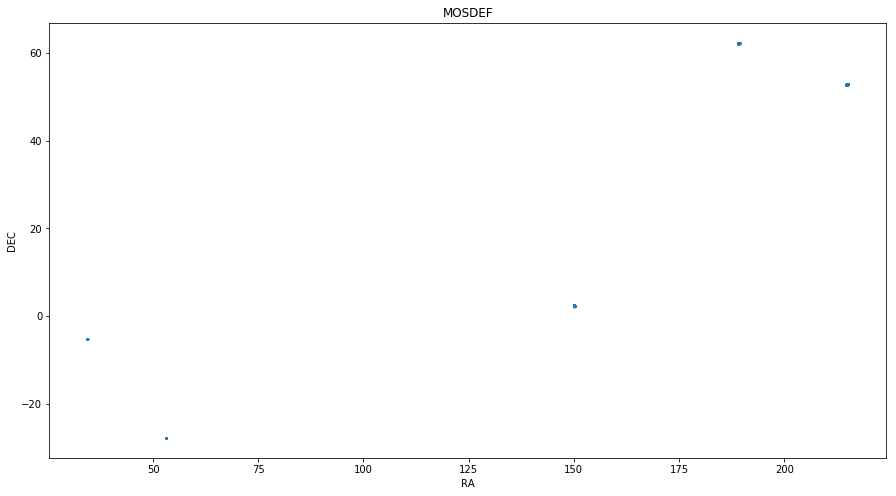

In [47]:
plt.figure(figsize=(15, 8))
plt.plot(cat['RA'], cat['DEC'], '.', markersize=2., alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('MOSDEF')
plt.show()

__Check for duplicates__

In [48]:
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os
home = os.path.expanduser("~")+'/'
sys.path.append(home+'git/Python/user_modules/')
import match_coord

77 objects with a nearby neighbor
77 6.91%


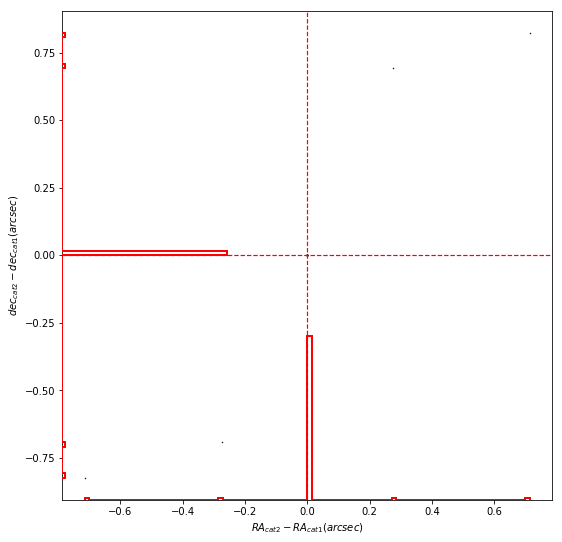

In [65]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['RA'], cat['DEC'], search_radius=1., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

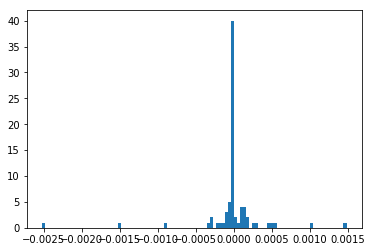

In [66]:
plt.hist(cat['Z_MOSFIRE'][idx1] - cat['Z_MOSFIRE'][idx2], 100)
plt.show()